# Titanic-survival-prediction-project

This notebook explores all the python based machine learning and data science libaries in an attempt to to build a machine learning model that would be abe to predict the people who survived the infamous Titanic wreck based on the data of those who survived it and those who didn't.

We're will break down this project into:
1. Problem Definition
2. Data
3. Model building
4. Experimenting
5. Working on the actual test data

## 1. Problem Definition

We want to make a machine learning model that will be able to predict those who survived the titanic shipwreck and those that didn't. We are aiming to get atleast 90% accuracy and if possible be able to compare our result to the kaggle leaderboard on this dataset.

## 2. Data

Our data is gotten from: https://www.kaggle.com/c/titanic

The data is split into:
* training set(891 values)
* test set(418 values)

the data dictionary:
* survival:
    * 0 = no
    * 1 = yes
* pclass: Ticket class
    * 1 = 1st(Upper)
    * 2 = 2nd(Middle)
    * 3 = 3rd(Lower)
* sex: sex/gender
* Age: Age of a person		
* sibsp: number of siblings/spouse aboard the Titanic	
* parch: number of parents/children aboard the Titanic
* ticket: Ticket number		
* fare: Passenger fare		
* cabin: Cabin number	
* embarked: Port of Embarkation
    * C = Cherbourg
    * Q = Queentown
    * S = Southampton

### Importing the data

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
training = pd.read_csv('train.csv')

### EDA(Exploratory Data Analysis)

In [32]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
training.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
type(training)

pandas.core.frame.DataFrame

In [50]:
training.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [56]:
training.index

RangeIndex(start=0, stop=891, step=1)

In [58]:
pd.crosstab(training.Survived, training.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [60]:
fm_surv = 233/(233+81)

In [62]:
m_surv = 109/(109+468)

In [64]:
fm_surv,m_surv

(0.7420382165605095, 0.18890814558058924)

In [132]:
# Checking the percentage of people who survived
print(f'the percentage of women who survived: {fm_surv * 100:.2f}')
print(f'the percentage of men who survived: {m_surv * 100:.2f}')
m = (m_surv * 100)
f =(fm_surv * 100)
mf = np.mean([m,f])
print(f'the percentage of people who survived: {mf:.2f}')

the percentage of women who survived: 74.20
the percentage of men who survived: 18.89
the percentage of people who survived: 46.55


In [172]:
training.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [176]:
np.mean(training.Age)

29.69911764705882

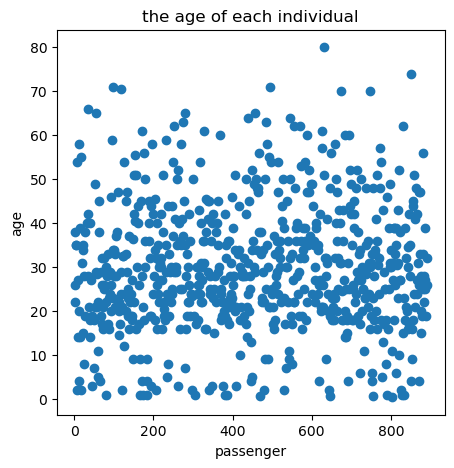

In [185]:
# plot a diagram showing the average age of those on the ship
fig, ax = plt.subplots(figsize=(5,5))
# Let's use a scatter plot
ax.scatter(x = training.PassengerId, y = training.Age)
ax.set(title='the age of each individual',
       xlabel = 'passenger',
       ylabel = 'age'
);

From the diagram above we can safely assume that most of the passengers on the Titanic was between 20 - 40 years

In [197]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [201]:
pd.crosstab(training.Survived, training.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [259]:
print(f'percentage of people in Upper class who survived: {136/(136+80)*100:.2f}')
print(f'percentage of people in Middle class who survived: {87/(87+97)*100:.2f}')
print(f'percentage of people in Lower class who survived: {136/(119+372)*100:.2f}')

percentage of people in Upper class who survived: 62.96
percentage of people in Middle class who survived: 47.28
percentage of people in Lower class who survived: 27.70


In [255]:
training.Pclass.value_counts() 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [243]:
labels = ['Upper', 'Middle', 'Lower']

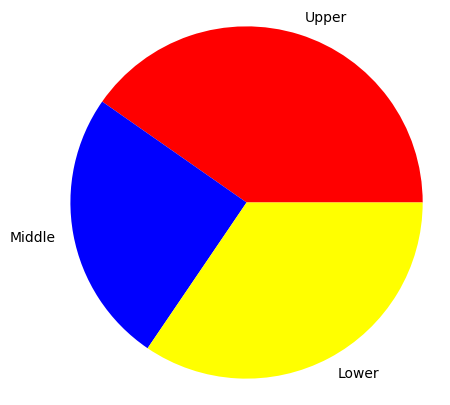

In [249]:
# Let's make a pie chart of those that survived based on the class they were on
fig, ax = plt.subplots(figsize=(5,5))
ax.pie([139,87,119],labels=labels,colors=['red','blue','yellow'])
ax.axis('equal');

In [265]:
training.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [271]:
print(f'the percentage of people who survived: {342/(549+342)*100:.2f}')

the percentage of people who survived: 38.38


In [315]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [277]:
training.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [281]:
pd.crosstab(training.Survived, training.SibSp)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [299]:
training.SibSp.value_counts(1)*100

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: proportion, dtype: float64

In [301]:
training.Survived.value_counts(1)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

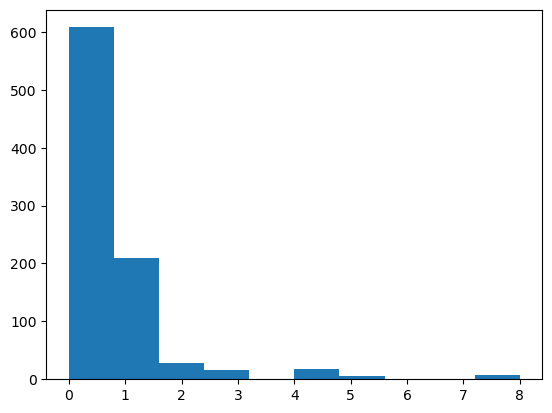

In [287]:
plt.hist(x=training.SibSp)

In [305]:
training.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [307]:
pd.crosstab(training.Survived, training.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [309]:
93/168*100

55.35714285714286

In [311]:
30/77*100

38.961038961038966

In [313]:
217/644*100

33.69565217391305

Based on this subsection we have can say that:
* the percentage of people who survived: 38.38
* the percentage of women who survived: 74.20
* 
the percentage of men who survived: 18.8
* the average age of the passengers was: 29.70
* percentage of people in Upper class who survived: 62.96
* 
percentage of people in Middle class who survived: 47.2
* 
percentage of people in Lower class who survived: 27.
* percentage of people with no siblings/spouse: 68.24
* percentage of people with a sibling/spouse:  23.6
* percentage of people with 2 siblings/spouse:   3.
* percentage of people with 3 siblings/spouse: 1.80
* percentage of people with 4 siblings/spouse: 2 02
* percentage of people with 5 siblings/spouse: 0.56
* percentage of people with 8 siblings/spouse: 0.7955611675611677055

## 3. Model Building

### Filling all missing data

In [401]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [344]:
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [368]:
df = pd.read_csv('train.csv')

In [370]:
df.Age.fillna(training.Age.mean(),inplace=True)

C:\Users\CEN GLOBAL SERVICES\AppData\Local\Temp\ipykernel_15280\3265695931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(training.Age.mean(),inplace=True)


In [378]:
df['Cabin'] = df['Cabin'].fillna('not_available')

In [380]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,not_available,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,not_available,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,not_available,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,not_available,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,not_available,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [390]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [396]:
df.Embarked.fillna('not_known', inplace = True)

C:\Users\CEN GLOBAL SERVICES\AppData\Local\Temp\ipykernel_15280\2531695453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Embarked.fillna('not_known', inplace = True)


In [398]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Converting all data into numbers

In [575]:
from sklearn.preprocessing import LabelEncoder
def transform(df):
    le = LabelEncoder()
    df_code = df[df.columns[:]].apply(le.fit_transform)

In [577]:
df_code

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,147,2
1,1,1,0,190,0,52,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,147,2
3,3,1,0,272,0,48,1,0,49,189,55,2
4,4,0,2,15,1,48,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,147,2
887,887,1,0,303,0,24,0,0,14,153,30,2
888,888,0,2,413,0,39,1,2,675,131,147,2
889,889,1,0,81,1,34,0,0,8,153,60,0


### Splitting our data into training and validation

In [580]:
from sklearn.model_selection import train_test_split

In [582]:
X = df_code.drop('Survived' ,axis=1)
y = df_code['Survived']

In [584]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,108,1,28,1,0,523,18,147,2
1,1,0,190,0,52,1,0,596,207,81,0
2,2,2,353,0,34,0,0,669,41,147,2
3,3,0,272,0,48,1,0,49,189,55,2
4,4,2,15,1,48,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,886,1,548,1,35,0,0,101,85,147,2
887,887,0,303,0,24,0,0,14,153,30,2
888,888,2,413,0,39,1,2,675,131,147,2
889,889,0,81,1,34,0,0,8,153,60,0


In [586]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [588]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

### import and fit a model

In [603]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [633]:
np.random.seed(42)
clf = RandomForestClassifier()
lsvc = LinearSVC()
knc = KNeighborsClassifier()
svc = SVC()
lr = LogisticRegression()

models = {"LinearSVC": lsvc,
          "KNC": knc,
          "SVC": svc,
          "LogisticRegression": lr,
          "RandomForestClassifier": clf}

result={}

def model(model):
    model.fit(X_train, y_train)
    result[model] = model.score(X_valid, y_valid)


In [635]:
model(clf)

In [637]:
model(lsvc)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [639]:
model(knc)

In [641]:
model(svc)

In [643]:
model(lr)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [647]:
result

{RandomForestClassifier(): 0.8435754189944135,
 LinearSVC(): 0.5363128491620112,
 KNeighborsClassifier(): 0.6983240223463687,
 SVC(): 0.7206703910614525,
 LogisticRegression(): 0.8324022346368715}

## 4. Experimenting

### Evaluate the just trained model

In [665]:
clf_y_pred = clf.predict(X_valid)
lr_y_pred = lr.predict(X_valid)
lsvc_y_pred = lsvc.predict(X_valid)
svc_y_pred = svc.predict(X_valid)
knc_y_pred = knc.predict(X_valid)

In [651]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [667]:

def evaluate(y_true, y_pred):
    print(f'precision_score:{precision_score(y_true, y_pred)}')
    print(f'recall_score:{recall_score(y_true, y_pred)}')
    print(f'f1_score:{f1_score(y_true, y_pred)}')
    print(f'classification_report:{classification_report(y_true, y_pred)}')
    

In [671]:
evaluate(clf_y_pred, y_valid)

precision_score:0.7205882352941176
recall_score:0.8448275862068966
f1_score:0.7777777777777778
classification_report:              precision    recall  f1-score   support

           0       0.92      0.84      0.88       121
           1       0.72      0.84      0.78        58

    accuracy                           0.84       179
   macro avg       0.82      0.84      0.83       179
weighted avg       0.85      0.84      0.85       179



In [673]:
evaluate(lr_y_pred, y_valid)

precision_score:0.7352941176470589
recall_score:0.8064516129032258
f1_score:0.7692307692307693
classification_report:              precision    recall  f1-score   support

           0       0.89      0.85      0.87       117
           1       0.74      0.81      0.77        62

    accuracy                           0.83       179
   macro avg       0.81      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



In [675]:
evaluate(lsvc_y_pred, y_valid)

precision_score:0.9264705882352942
recall_score:0.44680851063829785
f1_score:0.6028708133971292
classification_report:              precision    recall  f1-score   support

           0       0.30      0.87      0.44        38
           1       0.93      0.45      0.60       141

    accuracy                           0.54       179
   macro avg       0.61      0.66      0.52       179
weighted avg       0.79      0.54      0.57       179



In [677]:
evaluate(svc_y_pred, y_valid)

precision_score:0.3235294117647059
recall_score:0.8461538461538461
f1_score:0.46808510638297873
classification_report:              precision    recall  f1-score   support

           0       0.96      0.70      0.81       153
           1       0.32      0.85      0.47        26

    accuracy                           0.72       179
   macro avg       0.64      0.77      0.64       179
weighted avg       0.87      0.72      0.76       179



In [679]:
evaluate(knc_y_pred, y_valid)

precision_score:0.5
recall_score:0.6296296296296297
f1_score:0.5573770491803278
classification_report:              precision    recall  f1-score   support

           0       0.82      0.73      0.77       125
           1       0.50      0.63      0.56        54

    accuracy                           0.70       179
   macro avg       0.66      0.68      0.66       179
weighted avg       0.72      0.70      0.71       179



### hyperparameter tuning

**Using RandomizedSearchCV**

In [693]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [695]:
from sklearn.model_selection import RandomizedSearchCV

In [697]:
np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(estimator=lr,
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)

rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [699]:
rs_log_reg.score(X_valid, y_valid)

0.8324022346368715

In [701]:
lr.score(X_valid, y_valid)

0.8324022346368715

In [703]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [705]:
rs_rf.score(X_valid, y_valid)

0.8547486033519553

In [707]:
clf.score(X_valid, y_valid)

0.8435754189944135

In [711]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [715]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [768]:
clf = RandomForestClassifier(n_estimators= 910,
                             min_samples_split= 18,
                             min_samples_leaf= 1,
                             max_depth= 10)

**Using GridSearchCV**

In [771]:
from sklearn.model_selection import GridSearchCV 

In [773]:

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [774]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_valid, y_valid)

0.8379888268156425

In [777]:
gs_log_reg.best_params_


{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [779]:
lr = LogisticRegression({'C' : 0.7278953843983146, 'solver': 'liblinear'})

In [781]:
rs_grid = {'n_estimators': [800,910,1000],
 'min_samples_split': [18,15, 20],
 'min_samples_leaf': [1,2,3],
 'max_depth': [10]}

In [783]:
rs_clf = GridSearchCV(clf,
                    param_grid=rs_grid,
                    cv=5,
                    verbose=True)
                      

In [785]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10,
                                              min_samples_split=18,
                                              n_estimators=910),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [18, 15, 20],
                         'n_estimators': [800, 910, 1000]},
             verbose=True)

In [786]:
rs_clf.score(X_valid,y_valid)

0.8379888268156425

In [787]:
clf.fit(X_train, y_train)
clf.score(X_valid, y_valid)

0.8435754189944135

### Evaluate the tuned model

In [794]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

In [796]:
import seaborn as sns

In [802]:
y_pred = clf.predict(X_valid)

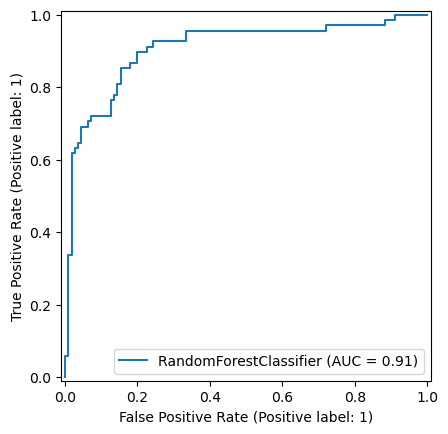

In [804]:
RocCurveDisplay.from_estimator(estimator=clf, 
                               X=X_valid, 
                               y=y_valid)

In [810]:
 cm = confusion_matrix(y_pred,y_valid)

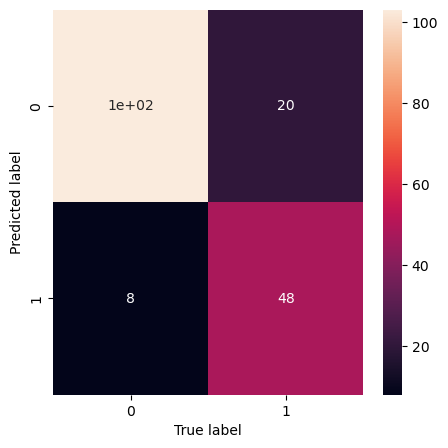

In [812]:
def plot_conf_mat(y_pred, y_valid):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(cm,
                     annot=True, # Annotate the boxes
                     cbar=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(y_pred, y_valid)

In [814]:
evaluate(y_pred, y_valid)

precision_score:0.7058823529411765
recall_score:0.8571428571428571
f1_score:0.7741935483870968
classification_report:              precision    recall  f1-score   support

           0       0.93      0.84      0.88       123
           1       0.71      0.86      0.77        56

    accuracy                           0.84       179
   macro avg       0.82      0.85      0.83       179
weighted avg       0.86      0.84      0.85       179



In [818]:
from joblib import dump, load

dump(clf, filename='Titanic_trained_model_clf.joblib')

['Titanic_trained_model_clf.joblib']

## 5. Working on the test data

In [820]:
clf = load(filename='Titanic_trained_model_clf.joblib')

In [822]:
test = pd.read_csv('test.csv')

In [824]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [826]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [830]:
test.Age.fillna(test.Age.mean(),inplace=True)

C:\Users\CEN GLOBAL SERVICES\AppData\Local\Temp\ipykernel_15280\2717440180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Age.fillna(test.Age.mean(),inplace=True)


In [832]:
test['Cabin'] = test['Cabin'].fillna('not_available')

In [834]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [836]:
test.Fare.fillna(test.Fare.mean(),inplace=True)

C:\Users\CEN GLOBAL SERVICES\AppData\Local\Temp\ipykernel_15280\794646699.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Fare.fillna(test.Fare.mean(),inplace=True)


In [838]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [844]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [913]:
from sklearn.preprocessing import LabelEncoder
# def transform(test):
le = LabelEncoder()
t_code = test[test.columns[:]].apply(le.fit_transform)

In [915]:
transform(test)

In [917]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,not_available,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,not_available,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,not_available,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,not_available,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,not_available,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,not_available,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,not_available,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,not_available,S


In [919]:
t_code

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,206,1,45,0,0,152,24,76,1
1,1,2,403,0,61,1,0,221,5,76,2
2,2,1,269,1,75,0,0,73,41,76,1
3,3,2,408,1,34,0,0,147,34,76,2
4,4,2,178,0,27,1,1,138,46,76,2
...,...,...,...,...,...,...,...,...,...,...,...
413,413,2,353,1,39,0,0,267,31,76,2
414,414,0,283,0,52,0,0,324,155,22,0
415,415,2,332,1,51,0,0,346,9,76,2
416,416,2,384,1,39,0,0,220,31,76,2


In [965]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [923]:
test_pred = clf.predict(t_code)

In [942]:
pred = pd.DataFrame(test.PassengerId, test_pred, columns=['PassengerID', 'Survived'])

In [946]:
pred['PassengerId'] = test.PassengerId

In [950]:
pred.drop('PassengerId', axis = 1)

,PassengerID,Survived
0,NaN,NaN
1,NaN,NaN
0,NaN,NaN
0,NaN,NaN
1,NaN,NaN
...,...,...
0,NaN,NaN
1,NaN,NaN
0,NaN,NaN
0,NaN,NaN


In [978]:
pred['PassengerID'] = test['PassengerId'].values

In [980]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [982]:
pred['PassengerID']

0     892
1     893
0     894
0     895
1     896
     ... 
0    1305
1    1306
0    1307
0    1308
1    1309
Name: PassengerID, Length: 418, dtype: int64

In [984]:
pred['Survived'] = test_pred

In [986]:
pred

,PassengerID,Survived
0,892,0
1,893,1
0,894,0
0,895,0
1,896,1
...,...,...
0,1305,0
1,1306,1
0,1307,0
0,1308,0


In [995]:
pred.to_csv('Titanic-predicted-data.csv', index=False)